<a href="https://colab.research.google.com/github/Manjiri1101/ML-algo/blob/main/Manjiri_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 1 : To learn K-mean clustering**

**Project : Wildfire Prediction**

**Problem Statement**

Try to see the effect of precipitation with wildfire.
1) Will try to cluster the Humidity with the Rainfall in 7 days of span.
When the humidity/ precipitation falls in the cluster we can say that there are chances of catching fire due to dryness. (using Scikit learn)
2) Grouping the years when fire happened with the humidity of the area when fire happened.

**Dataset Used**
Dataset from Kaggle : https://www.kaggle.com/capcloudcoder/us-wildfire-data-plus-other-attributes?select=Wildfire_att_description.txt



**About dataset:**

This dataset consist of random 50000 samples from https://www.kaggle.com/rtatman/188-million-us-wildfires dataset.
It has historic vagetation, weather data, and geographical coordinates of wildfire.
From this dataset , I am focusing on 1) fire_mag: magnitude of fire intensity (scaled version of fire_size)
2) Prec_pre_7: precipitation in mm at the location of fire upto 7 days prior
3) Hum_pre_7 : humidity in % at the location of fire upto 7 days prior
(Above information is provided in the dataset)

**K-means clustering**

**Part A - By using Scikit Learn**

In [ ]:
  # Importing the required Python Packages
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
import seaborn as sns; sns.set()  # styling of the plottings
import numpy as np
import pandas as pd 
from sklearn import neighbors, datasets

In [ ]:
# df = pd.read_csv('D:\FW_Veg_Rem_combined.csv')
# df.head(10)

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

df = pd.read_csv('/content/gdrive/MyDrive/FW_Veg_Rem_combined.csv')

df.head(10)

,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,disc_date_final,cont_date_final,putout_time,disc_date_pre,disc_pre_year,disc_pre_month,wstation_usaf,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,weather_file,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,NaN,Feb,NaN,NaN,NaN,1/12/2007,2007,Jan,785140,58917.69716,11603,1945,2018,12,1.0,785140-11603-2007.gz,24.480974,24.716923,24.902597,24.527961,4.341807,3.492857,3.262092,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,NaN,Dec,NaN,NaN,NaN,11/11/2006,2006,Nov,723235,32665.34327,13896,1978,2020,15,0.1,723235-13896-2006.gz,7.553433,7.010000,0.343529,10.448298,2.709764,2.881707,1.976471,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,NaN,Feb,NaN,NaN,NaN,1/30/2004,2004,Jan,723235,105122.14950,13896,1978,2020,16,1.0,723235-13896-2004.gz,4.971930,5.782766,5.558750,13.696600,3.364499,2.923830,2.695833,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,6/6/2005,Jun,6/6/2005 2:14,6/6/2005 18:00,0 days 00:00:00.000000000,5/7/2005,2005,May,724880,43433.32978,23185,1942,2020,0,0.1,724880-23185-2005.gz,16.275967,18.996181,18.142564,0.000000,4.054982,3.398329,3.671282,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,NaN,Sep,NaN,NaN,NaN,8/23/1999,1999,Aug,722312,25940.57409,3908,1987,2016,12,0.1,File Not Found,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633
5,5,5,NaN,1.0,B,Debris Burning,32.063900,-82.417800,GA,3/22/1999,NaN,Mar,NaN,NaN,NaN,2/20/1999,1999,Feb,722691,53847.19792,366,1942,2020,12,0.1,File Not Found,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.139643
6,6,6,NaN,5.2,B,Debris Burning,31.316978,-83.393649,GA,1/10/2009,NaN,Jan,NaN,NaN,NaN,12/11/2008,2008,Dec,747810,42972.94028,99999,2006,2020,12,0.1,747810-13857-2008.gz,14.877341,16.409326,0.000000,0.000000,2.000214,1.727202,0.000000,0.000000,79.896679,73.431818,0.000000,0.000000,26.0,0.0,0.0,0.0,0.148904
7,7,7,NaN,1.0,B,Campfire,30.904720,-93.557500,TX,11/12/2005,NaN,Nov,NaN,NaN,NaN,10/13/2005,2005,Oct,722820,64017.11754,99999,1984,2020,12,0.1,722820-99999-2005.gz,16.851939,16.997783,20.434783,11.985560,1.331257,1.472949,1.424783,2.148857,72.899478,75.061381,77.924623,70.732911,28.4,27.5,1.2,55.4,0.241894
8,8,8,NaN,1.0,B,Arson,35.900310,-92.061180,AR,8/8/2007,NaN,Aug,NaN,NaN,NaN,7/9/2007,2007,Jul,723448,42133.15187,53934,1973,2020,15,0.1,723448-53934-2007.gz,26.655241,27.264870,28.968064,28.682688,1.768074,1.705297,1.827944,2.103090,68.319022,67.575419,65.077844,60.196858,6.6,3.3,0.0,46.4,0.224629
9,9,9,CRAZY,1.0,B,Miscellaneous,48.839400,-99.718500,ND,4/19/2004,4/19/2004,Apr,4/19/2004 20:30,4/19/2004 22:30,0 days 00:00:00.000000000,3/20/2004,2004,Mar,727675,129109.88140,99999,1936,2020,15,0.1,727675-99999-2004.gz,4.600950,6.861878,6.053333,0.000000,6.380760,6.334254,6.645333,0.000000,64.606509,55.943038,54.337838,0.000000,12.3,1.8,0.0,0.0,0.291683


In [ ]:
#printing column names, the values and their types
print(df.shape)
print(df.info())

(55367, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55367 entries, 0 to 55366
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        55367 non-null  int64  
 1   Unnamed: 0.1      55367 non-null  int64  
 2   fire_name         25913 non-null  object 
 3   fire_size         55367 non-null  float64
 4   fire_size_class   55367 non-null  object 
 5   stat_cause_descr  55367 non-null  object 
 6   latitude          55367 non-null  float64
 7   longitude         55367 non-null  float64
 8   state             55367 non-null  object 
 9   disc_clean_date   55367 non-null  object 
 10  cont_clean_date   27477 non-null  object 
 11  discovery_month   55367 non-null  object 
 12  disc_date_final   28708 non-null  object 
 13  cont_date_final   25632 non-null  object 
 14  putout_time       27477 non-null  object 
 15  disc_date_pre     55367 non-null  object 
 16  disc_pre_year     55367 non-

In [ ]:
# Describe the table
df.describe()

,Unnamed: 0,Unnamed: 0.1,fire_size,latitude,longitude,disc_pre_year,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
count,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000
mean,27683.000000,27683.000000,2104.645161,36.172866,-94.757971,2003.765474,40256.474678,61029.607311,1979.341900,2015.480990,11.066068,9.414366,10.688533,10.800765,10.907171,7.838208,1.926108,1.844133,1.791331,1.132284,40.781796,38.453935,37.001865,25.056738,26.277046,11.654253,4.689920,15.590440,0.236799
std,15983.220514,15983.220514,14777.005364,6.724348,15.878194,6.584889,25272.081410,40830.393541,23.372803,6.767851,5.595719,26.820363,10.467579,10.633803,10.807985,10.565555,2.106165,2.122697,2.139708,2.030611,31.086856,31.042541,30.827885,31.187638,112.050198,56.920510,31.205327,59.757113,0.144865
min,0.000000,0.000000,0.510000,17.956533,-165.936000,1991.000000,6.166452,100.000000,1931.000000,1993.000000,0.000000,0.100000,-49.210526,-37.000000,-20.846104,-22.750000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,13841.500000,13841.500000,1.200000,32.265960,-102.541513,1999.000000,21373.361515,13927.000000,1973.000000,2010.000000,9.000000,0.100000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.137800
50%,27683.000000,27683.000000,4.000000,34.600000,-91.212359,2005.000000,35621.334820,73803.000000,1978.000000,2020.000000,12.000000,0.100000,9.945559,10.122047,10.237860,0.000000,2.422880,2.295954,2.175431,0.000000,55.657480,51.753846,48.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.202114
75%,41524.500000,41524.500000,20.000000,38.975235,-82.847500,2009.000000,53985.904315,99999.000000,2004.000000,2020.000000,15.000000,1.000000,20.015591,20.259329,20.502848,17.011853,3.469751,3.435482,3.392260,2.848603,67.384352,65.911469,64.645296,60.193606,18.900000,3.600000,0.000000,0.000000,0.284782
max,55366.000000,55366.000000,606945.000000,69.849500,-65.285833,2015.000000,224153.661800,99999.000000,2014.000000,2020.000000,16.000000,100.000000,46.600000,51.567797,55.000000,55.000000,29.800000,29.800000,25.700000,24.200000,96.000000,94.000000,96.000000,94.000000,13560.800000,2527.000000,1638.000000,2126.000000,1.000000


In [ ]:
for col in df.columns:
    print(col)



Unnamed: 0
Unnamed: 0.1
fire_name
fire_size
fire_size_class
stat_cause_descr
latitude
longitude
state
disc_clean_date
cont_clean_date
discovery_month
disc_date_final
cont_date_final
putout_time
disc_date_pre
disc_pre_year
disc_pre_month
wstation_usaf
dstation_m
wstation_wban
wstation_byear
wstation_eyear
Vegetation
fire_mag
weather_file
Temp_pre_30
Temp_pre_15
Temp_pre_7
Temp_cont
Wind_pre_30
Wind_pre_15
Wind_pre_7
Wind_cont
Hum_pre_30
Hum_pre_15
Hum_pre_7
Hum_cont
Prec_pre_30
Prec_pre_15
Prec_pre_7
Prec_cont
remoteness


Above I listed the column names, I will be using Prec_pre_7 which shows the precipitation Aka rain fall volume in the particular region. 

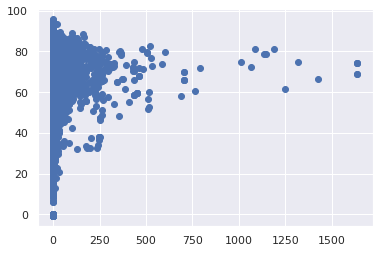

In [ ]:
plt.scatter(df['Prec_pre_7'], df['Hum_pre_7'])

In [ ]:
X=df[['Prec_pre_7','Hum_pre_7']]

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xfit=ss.fit_transform(X)

**Finding K by Elbow method**

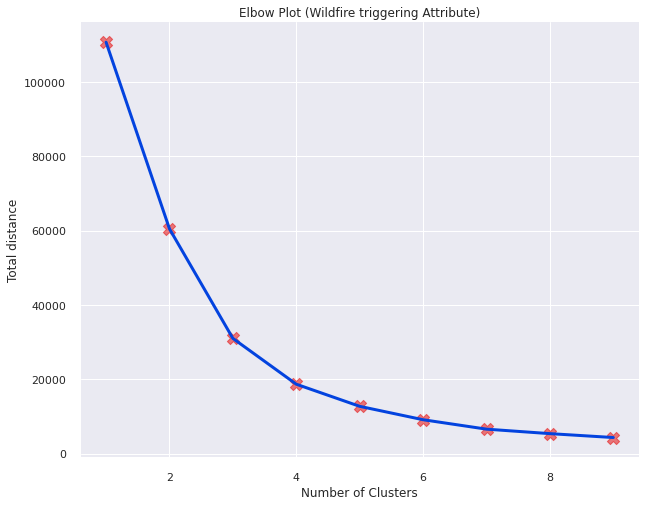

In [ ]:
# Search for best number of clusters, from one to ten by using elbow method
n_clusters = np.arange(1, 10)
distances = np.zeros(n_clusters.shape[0])


for i, nc in enumerate(n_clusters):
    # We build our model for nc clusters
    model = KMeans(n_clusters=nc, n_init=10, random_state=0)
    model.fit(xfit)
    distances[i] = model.inertia_

fig, ax = plt.subplots(figsize=(10, 8)) # plotting elbow graph


ax.scatter(n_clusters, distances, s=150, 
           c=sns.xkcd_rgb['red'], marker='X', alpha=0.5)
ax.plot(n_clusters, distances, lw=3, linestyle='-', 
        color=sns.xkcd_rgb['blue'])

# Define elbow at three clusters
elb = (n_clusters[2], distances[2])

# Decorate Plot
ax.set(title='Elbow Plot (Wildfire triggering Attribute)', 
       xlabel='Number of Clusters', 
       ylabel='Total distance')
ax.set_xticks(range(2,10,2))
sns.despine(offset=5, trim=True)

From above we can derive the value for "K" which is 4

In [ ]:
# Appling K-means clustering
km=KMeans(n_clusters=4 , init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_km = km.fit_predict(X)
y_km

array([2, 2, 2, ..., 2, 0, 2], dtype=int32)

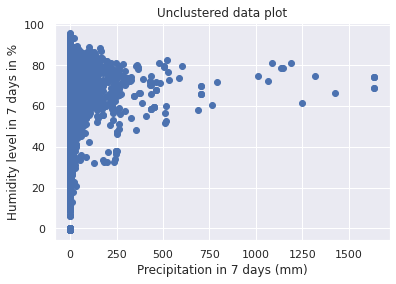

In [ ]:
plt.scatter(df['Prec_pre_7'], df['Hum_pre_7'])
plt.xlabel('Precipitation in 7 days (mm)')
plt.ylabel('Humidity level in 7 days in %')
plt.title('Unclustered data plot')
plt.show()

In [ ]:
df['Arry'] = y_km
df.head(10)

,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,disc_date_final,cont_date_final,putout_time,disc_date_pre,disc_pre_year,disc_pre_month,wstation_usaf,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,weather_file,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,Arry
0,0,0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,NaN,Feb,NaN,NaN,NaN,1/12/2007,2007,Jan,785140,58917.69716,11603,1945,2018,12,1.0,785140-11603-2007.gz,24.480974,24.716923,24.902597,24.527961,4.341807,3.492857,3.262092,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923,2
1,1,1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,NaN,Dec,NaN,NaN,NaN,11/11/2006,2006,Nov,723235,32665.34327,13896,1978,2020,15,0.1,723235-13896-2006.gz,7.553433,7.010000,0.343529,10.448298,2.709764,2.881707,1.976471,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355,2
2,2,2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,NaN,Feb,NaN,NaN,NaN,1/30/2004,2004,Jan,723235,105122.14950,13896,1978,2020,16,1.0,723235-13896-2004.gz,4.971930,5.782766,5.558750,13.696600,3.364499,2.923830,2.695833,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544,2
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,6/6/2005,Jun,6/6/2005 2:14,6/6/2005 18:00,0 days 00:00:00.000000000,5/7/2005,2005,May,724880,43433.32978,23185,1942,2020,0,0.1,724880-23185-2005.gz,16.275967,18.996181,18.142564,0.000000,4.054982,3.398329,3.671282,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447,2
4,4,4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,NaN,Sep,NaN,NaN,NaN,8/23/1999,1999,Aug,722312,25940.57409,3908,1987,2016,12,0.1,File Not Found,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633,0
5,5,5,NaN,1.0,B,Debris Burning,32.063900,-82.417800,GA,3/22/1999,NaN,Mar,NaN,NaN,NaN,2/20/1999,1999,Feb,722691,53847.19792,366,1942,2020,12,0.1,File Not Found,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.139643,0
6,6,6,NaN,5.2,B,Debris Burning,31.316978,-83.393649,GA,1/10/2009,NaN,Jan,NaN,NaN,NaN,12/11/2008,2008,Dec,747810,42972.94028,99999,2006,2020,12,0.1,747810-13857-2008.gz,14.877341,16.409326,0.000000,0.000000,2.000214,1.727202,0.000000,0.000000,79.896679,73.431818,0.000000,0.000000,26.0,0.0,0.0,0.0,0.148904,0
7,7,7,NaN,1.0,B,Campfire,30.904720,-93.557500,TX,11/12/2005,NaN,Nov,NaN,NaN,NaN,10/13/2005,2005,Oct,722820,64017.11754,99999,1984,2020,12,0.1,722820-99999-2005.gz,16.851939,16.997783,20.434783,11.985560,1.331257,1.472949,1.424783,2.148857,72.899478,75.061381,77.924623,70.732911,28.4,27.5,1.2,55.4,0.241894,2
8,8,8,NaN,1.0,B,Arson,35.900310,-92.061180,AR,8/8/2007,NaN,Aug,NaN,NaN,NaN,7/9/2007,2007,Jul,723448,42133.15187,53934,1973,2020,15,0.1,723448-53934-2007.gz,26.655241,27.264870,28.968064,28.682688,1.768074,1.705297,1.827944,2.103090,68.319022,67.575419,65.077844,60.196858,6.6,3.3,0.0,46.4,0.224629,2
9,9,9,CRAZY,1.0,B,Miscellaneous,48.839400,-99.718500,ND,4/19/2004,4/19/2004,Apr,4/19/2004 20:30,4/19/2004 22:30,0 days 00:00:00.000000000,3/20/2004,2004,Mar,727675,129109.88140,99999,1936,2020,15,0.1,727675-99999-2004.gz,4.600950,6.861878,6.053333,0.000000,6.380760,6.334254,6.645333,0.000000,64.606509,55.943038,54.337838,0.000000,12.3,1.8,0.0,0.0,0.291683,2


In [ ]:
#centroid
km.cluster_centers_ 

array([[-6.15358544e-01,  1.80066011e+00],
       [ 2.90026531e+02,  6.68497454e+01],
       [ 6.04282834e+00,  6.09223545e+01],
       [ 1.34432143e+03,  7.35912130e+01]])

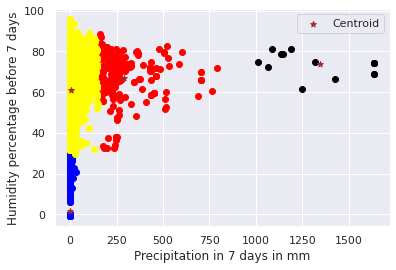

In [ ]:
df1 = df[df.Arry==0]
df2 = df[df.Arry==1]
df3 = df[df.Arry==2]
df4 = df[df.Arry==3]
plt.scatter(df1.Prec_pre_7,df1.Hum_pre_7,color = 'blue')
plt.scatter(df2.Prec_pre_7,df2.Hum_pre_7, color = 'red')
plt.scatter(df3.Prec_pre_7,df3.Hum_pre_7, color = 'yellow')
plt.scatter(df4.Prec_pre_7,df4.Hum_pre_7, color = 'black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color ='brown', marker='*', label ='Centroid')
# plt.scatter(df['fire_mag'],df['fire_size'] , color = 'white')
plt.xlabel("Precipitation in 7 days in mm")
plt.ylabel('Humidity percentage before 7 days')
plt.legend()

Interpretation:



1.   From above clustering, we can interpret that when there is less amount of rain, humidity will also be less. Which means no moisture and dryness, which is favourable for catching fire.
2.   I tried to plot clusters with the fire magnitude, which is shown below. 




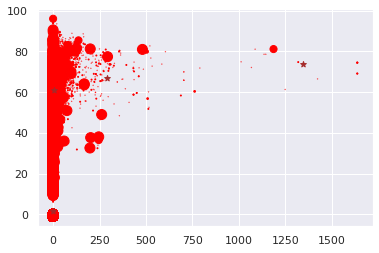

In [ ]:

plt.scatter(df['Prec_pre_7'], df['Hum_pre_7'], s=df['fire_mag'], c= 'red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color ='brown', marker='*', label ='Centroid')

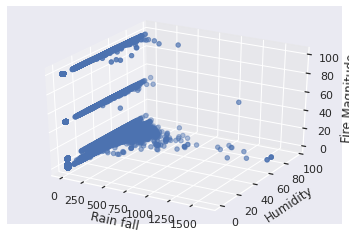

In [ ]:
#This plot shows the corelation between Fire Magnitude and Cluster formed between (Reainfall and Humidity)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = df['Prec_pre_7']
y = df['Hum_pre_7']
z = df['fire_mag']
ax.scatter(x, y, z)
ax.set_xlabel('Rain fall')
ax.set_ylabel("Humidity")
ax.set_zlabel("Fire Magnitude")
plt.show()

# plt.scatter(x,y,z)

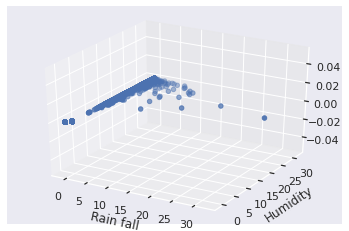

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
a = df1.Prec_pre_7
b = df1.Hum_pre_7
t = df['fire_mag']
ax.scatter(a, b)
ax.set_xlabel('Rain fall')
ax.set_ylabel("Humidity")


plt.show()

# # plt.scatter(x,y,z)
# plt.scatter(df1.Prec_pre_7,df1.Hum_pre_7,color = 'blue')

**Part B: By Using Pytorch**

I have implemented below clustering on column - Year (fire occurence), and Humidity level 7 days prior wildfire.
By using this clustering we can determine if just Humidity is factor for considering the cause of Fire or not.

In [ ]:
!pip install kmeans-pytorch

In [ ]:
import numpy as np
import torch
import torch.cuda
from numba import jit
from torch.autograd import Function
from numba import cuda
import math
from kmeans_pytorch import kmeans, kmeans_predict

In [ ]:
#Open the dataset
df = pd.read_csv('/content/gdrive/MyDrive/FW_Veg_Rem_combined.csv')

df.head(10)

,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,disc_date_final,cont_date_final,putout_time,disc_date_pre,disc_pre_year,disc_pre_month,wstation_usaf,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,weather_file,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,NaN,Feb,NaN,NaN,NaN,1/12/2007,2007,Jan,785140,58917.69716,11603,1945,2018,12,1.0,785140-11603-2007.gz,24.480974,24.716923,24.902597,24.527961,4.341807,3.492857,3.262092,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,NaN,Dec,NaN,NaN,NaN,11/11/2006,2006,Nov,723235,32665.34327,13896,1978,2020,15,0.1,723235-13896-2006.gz,7.553433,7.010000,0.343529,10.448298,2.709764,2.881707,1.976471,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,NaN,Feb,NaN,NaN,NaN,1/30/2004,2004,Jan,723235,105122.14950,13896,1978,2020,16,1.0,723235-13896-2004.gz,4.971930,5.782766,5.558750,13.696600,3.364499,2.923830,2.695833,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,6/6/2005,Jun,6/6/2005 2:14,6/6/2005 18:00,0 days 00:00:00.000000000,5/7/2005,2005,May,724880,43433.32978,23185,1942,2020,0,0.1,724880-23185-2005.gz,16.275967,18.996181,18.142564,0.000000,4.054982,3.398329,3.671282,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,NaN,Sep,NaN,NaN,NaN,8/23/1999,1999,Aug,722312,25940.57409,3908,1987,2016,12,0.1,File Not Found,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633
5,5,5,NaN,1.0,B,Debris Burning,32.063900,-82.417800,GA,3/22/1999,NaN,Mar,NaN,NaN,NaN,2/20/1999,1999,Feb,722691,53847.19792,366,1942,2020,12,0.1,File Not Found,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.139643
6,6,6,NaN,5.2,B,Debris Burning,31.316978,-83.393649,GA,1/10/2009,NaN,Jan,NaN,NaN,NaN,12/11/2008,2008,Dec,747810,42972.94028,99999,2006,2020,12,0.1,747810-13857-2008.gz,14.877341,16.409326,0.000000,0.000000,2.000214,1.727202,0.000000,0.000000,79.896679,73.431818,0.000000,0.000000,26.0,0.0,0.0,0.0,0.148904
7,7,7,NaN,1.0,B,Campfire,30.904720,-93.557500,TX,11/12/2005,NaN,Nov,NaN,NaN,NaN,10/13/2005,2005,Oct,722820,64017.11754,99999,1984,2020,12,0.1,722820-99999-2005.gz,16.851939,16.997783,20.434783,11.985560,1.331257,1.472949,1.424783,2.148857,72.899478,75.061381,77.924623,70.732911,28.4,27.5,1.2,55.4,0.241894
8,8,8,NaN,1.0,B,Arson,35.900310,-92.061180,AR,8/8/2007,NaN,Aug,NaN,NaN,NaN,7/9/2007,2007,Jul,723448,42133.15187,53934,1973,2020,15,0.1,723448-53934-2007.gz,26.655241,27.264870,28.968064,28.682688,1.768074,1.705297,1.827944,2.103090,68.319022,67.575419,65.077844,60.196858,6.6,3.3,0.0,46.4,0.224629
9,9,9,CRAZY,1.0,B,Miscellaneous,48.839400,-99.718500,ND,4/19/2004,4/19/2004,Apr,4/19/2004 20:30,4/19/2004 22:30,0 days 00:00:00.000000000,3/20/2004,2004,Mar,727675,129109.88140,99999,1936,2020,15,0.1,727675-99999-2004.gz,4.600950,6.861878,6.053333,0.000000,6.380760,6.334254,6.645333,0.000000,64.606509,55.943038,54.337838,0.000000,12.3,1.8,0.0,0.0,0.291683


In [ ]:
# Replace all NaN values with 0
df = df.replace(np.nan, 0)
df.head(10)

,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,disc_date_final,cont_date_final,putout_time,disc_date_pre,disc_pre_year,disc_pre_month,wstation_usaf,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,weather_file,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,0,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,0,Feb,0,0,0,1/12/2007,2007,Jan,785140,58917.69716,11603,1945,2018,12,1.0,785140-11603-2007.gz,24.480974,24.716923,24.902597,24.527961,4.341807,3.492857,3.262092,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,0,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,0,Dec,0,0,0,11/11/2006,2006,Nov,723235,32665.34327,13896,1978,2020,15,0.1,723235-13896-2006.gz,7.553433,7.010000,0.343529,10.448298,2.709764,2.881707,1.976471,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,0,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,0,Feb,0,0,0,1/30/2004,2004,Jan,723235,105122.14950,13896,1978,2020,16,1.0,723235-13896-2004.gz,4.971930,5.782766,5.558750,13.696600,3.364499,2.923830,2.695833,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,6/6/2005,Jun,6/6/2005 2:14,6/6/2005 18:00,0 days 00:00:00.000000000,5/7/2005,2005,May,724880,43433.32978,23185,1942,2020,0,0.1,724880-23185-2005.gz,16.275967,18.996181,18.142564,0.000000,4.054982,3.398329,3.671282,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,0,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,0,Sep,0,0,0,8/23/1999,1999,Aug,722312,25940.57409,3908,1987,2016,12,0.1,File Not Found,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633
5,5,5,0,1.0,B,Debris Burning,32.063900,-82.417800,GA,3/22/1999,0,Mar,0,0,0,2/20/1999,1999,Feb,722691,53847.19792,366,1942,2020,12,0.1,File Not Found,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.139643
6,6,6,0,5.2,B,Debris Burning,31.316978,-83.393649,GA,1/10/2009,0,Jan,0,0,0,12/11/2008,2008,Dec,747810,42972.94028,99999,2006,2020,12,0.1,747810-13857-2008.gz,14.877341,16.409326,0.000000,0.000000,2.000214,1.727202,0.000000,0.000000,79.896679,73.431818,0.000000,0.000000,26.0,0.0,0.0,0.0,0.148904
7,7,7,0,1.0,B,Campfire,30.904720,-93.557500,TX,11/12/2005,0,Nov,0,0,0,10/13/2005,2005,Oct,722820,64017.11754,99999,1984,2020,12,0.1,722820-99999-2005.gz,16.851939,16.997783,20.434783,11.985560,1.331257,1.472949,1.424783,2.148857,72.899478,75.061381,77.924623,70.732911,28.4,27.5,1.2,55.4,0.241894
8,8,8,0,1.0,B,Arson,35.900310,-92.061180,AR,8/8/2007,0,Aug,0,0,0,7/9/2007,2007,Jul,723448,42133.15187,53934,1973,2020,15,0.1,723448-53934-2007.gz,26.655241,27.264870,28.968064,28.682688,1.768074,1.705297,1.827944,2.103090,68.319022,67.575419,65.077844,60.196858,6.6,3.3,0.0,46.4,0.224629
9,9,9,CRAZY,1.0,B,Miscellaneous,48.839400,-99.718500,ND,4/19/2004,4/19/2004,Apr,4/19/2004 20:30,4/19/2004 22:30,0 days 00:00:00.000000000,3/20/2004,2004,Mar,727675,129109.88140,99999,1936,2020,15,0.1,727675-99999-2004.gz,4.600950,6.861878,6.053333,0.000000,6.380760,6.334254,6.645333,0.000000,64.606509,55.943038,54.337838,0.000000,12.3,1.8,0.0,0.0,0.291683


In [ ]:
# df_work = df.loc[:,['fire_mag','Hum_pre_7','Prec_pre_7']]
df_work = df.loc[:,['disc_pre_year','Hum_pre_7']]
df_work.head(3)
df_work = df_work[df_work['Hum_pre_7'] > 0]
# df_work = df_work[df_work['putout_time'] > 0]

In [ ]:

# data
data_size, dims, num_clusters = df_work, 2, 3
sample_array = df_work.to_numpy()
x = torch.from_numpy(sample_array)

In [ ]:
print(x)

tensor([[2007.0000,   76.3816],
        [2006.0000,   55.5059],
        [2004.0000,   76.8128],
        ...,
        [2015.0000,   54.6257],
        [2015.0000,   44.4440],
        [2015.0000,   37.1786]], dtype=torch.float64)


In [ ]:
# Finding K means clustering by using Pytorch
# k-means
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=num_clusters, distance='euclidean'
)

running k-means on cpu..


[running kmeans]: 21it [00:02, 11.77it/s, center_shift=0.000010, iteration=22, tol=0.000100]

In [ ]:
print(cluster_ids_x)
print(cluster_centers)

tensor([1, 2, 1,  ..., 2, 2, 0])
tensor([[2003.8939,   32.5209],
        [2004.9075,   70.8364],
        [2005.0421,   55.2644]])


Text(0, 0.5, 'Humidity % of area when fire started')

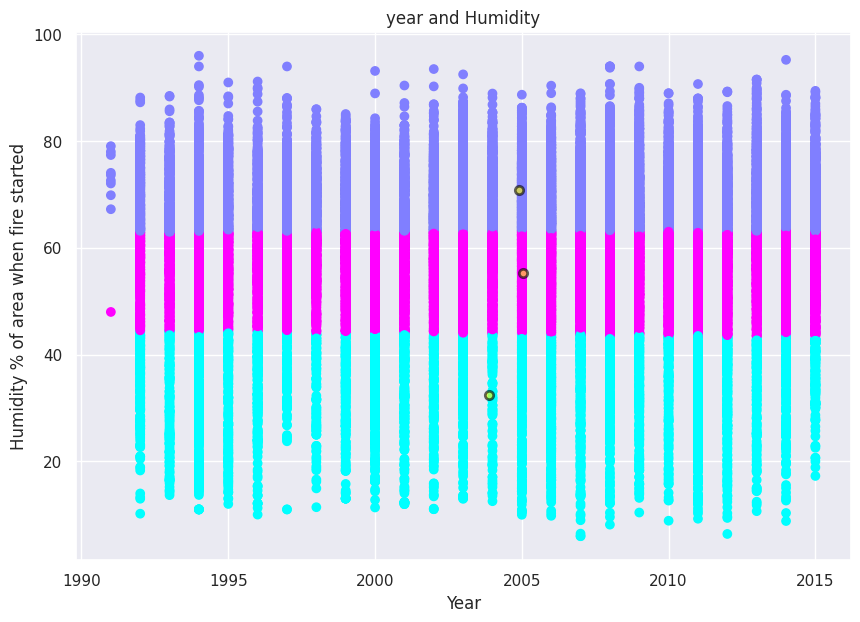

In [ ]:
plt.figure(figsize=(10, 7), dpi=100)
plt.scatter(x[:, 0], x[:, 1], c=cluster_ids_x, cmap='cool')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='yellow', alpha=0.6, edgecolors='black', linewidths=2)
plt.title('year and Humidity')
plt.xlabel('Year')
plt.ylabel('Humidity % of area when fire started')

Interpretation:
From above plotting we can say that there is uniformity in the Humidity range throughout the time period. So focusing just on Humidity factor will not work in order to predict the wildfire. Along with Humidity, we should consider other factors too.